We are interested in solving the equation $f(x)=0$ where $f$ is a real-valued function and satisfy a variety of conditions depending upon the method that we employ to approximate the solutions. For now, assume $f:\mathbb{R}\to\mathbb{R}$ is defined as
$$f(x):=2x^3-\frac{5}{2}x-5$$
Note that
$$f'(x)=6x^2-\frac{5}{2}$$
However, using symbolic differentiation would be kind of cheating at this point. So, we use the following definition of derivatives
$$f'(x)=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}$$
and approximate the derivative using a very small value of $h$ (say $10^{-10}$). Therefore,
$$f'(x)\approx \frac{f(x+10^{-10})-f(x)}{10^{-10}}$$

In [37]:
import numpy as np

#Defining the function
def f(x):
  return 2*x**3-2.5*x-5


# The derivative of f is now computed.
def der_f(x):
  return (f(x+10**(-10))-f(x))/(10**(-10))

Now we plot the graph of $f$ to get a better idea of how this function behaves.

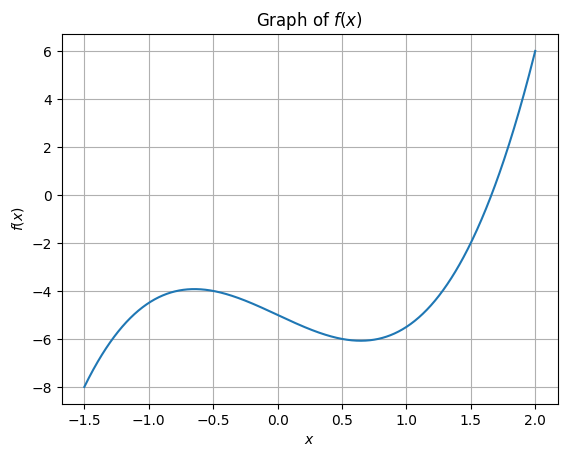

In [38]:
# Let's have a look at the graph of f.

import matplotlib.pyplot as plt

x = np.linspace(-1.5,2,1000)
y = f(x)

plt.plot(x,y)
plt.grid('True')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Graph of $f(x)$')
plt.show()

For all the methods we are discussing here, only the Newton-Raphson method needs ONE guess value $(x_0)$ is needed. For the remaining, we need two guess values ($a$ and $b$) with special consideration that the root $x^*\in[a,b]$ for the bisection, regula-falsi and improved regula-falsi methods. Here, we initialise $a=1,b=2$ and the tolearance value $\mathrm{tol}=10^{-5}$%.

In [39]:
a=1.0
b=2.0
tol=0.00001

We create a table to store and display our obtained results.

In [40]:
# Creating the dataframe for displaying results

import pandas as pd

cols_bm={'Iteration':[],'a':[],'b':[],'c':[],'f(c)':[],'Relative Absolute Error':[]}
cols_rf={'Iteration':[],'a':[],'b':[],'c':[],'f(c)':[],'Relative Absolute Error':[]}
cols_mrf={'Iteration':[],'a':[],'b':[],'c':[],'f(c)':[],'Relative Absolute Error':[]}
cols_sm={'Iteration':[],'a':[],'b':[],'c':[],'f(c)':[],'Relative Absolute Error':[]}
cols_nrm={'Iteration':[],'a':[],'f(a)':[],'Relative Absolute Error':[]}

Here we present the bisection method algorithm.

In [41]:
# Bisection Method

c=(a+b)/2 # mid-point

cols_bm['Iteration'].append(0)
cols_bm['a'].append(a)
cols_bm['b'].append(b)
cols_bm['c'].append(c)
cols_bm['f(c)'].append(f(c))
cols_bm['Relative Absolute Error'].append('NaN')

if f(a)*f(b)>=0: print("These guess values won't work!") # Are the guess values alright?

elif f(a)*f(b)<0:
   for i in range(1,1000):
     c_old = c # storing the previous value of c
     if f(a)*f(c)<0: # root lies between a and c
       b=c
       c=(a+b)/2
     elif f(c)*f(b)<0: # root lies between c and b
       a=c
       c=(a+b)/2
     elif f(c)==0: break # c is a root
     err = (abs(c_old-c)/abs(c))*100 # calculation of relative absolute error
     cols_bm['Iteration'].append(i)
     cols_bm['a'].append(a)
     cols_bm['b'].append(b)
     cols_bm['c'].append(c)
     cols_bm['f(c)'].append(f(c))
     cols_bm['Relative Absolute Error'].append(err)
     if err<tol: break # breaking condition



# Displaying the results
df_bm = pd.DataFrame(cols_bm)
df_bm

,Iteration,a,b,c,f(c),Relative Absolute Error
0,0,1.000000,2.000000,1.500000,-2.000000e+00,NaN
1,1,1.500000,2.000000,1.750000,1.343750e+00,14.285714
2,2,1.500000,1.750000,1.625000,-4.804688e-01,7.692308
3,3,1.625000,1.750000,1.687500,3.920898e-01,3.703704
4,4,1.625000,1.687500,1.656250,-5.389404e-02,1.886792
5,5,1.656250,1.687500,1.671875,1.666489e-01,0.934579
6,6,1.656250,1.671875,1.664062,5.576801e-02,0.469484
7,7,1.656250,1.664062,1.660156,7.849932e-04,0.235294
8,8,1.656250,1.660156,1.658203,-2.659248e-02,0.117786
9,9,1.658203,1.660156,1.659180,-1.291324e-02,0.058858


According to the bisection method, the required root is $1.660100$.

The values of $a$ and $b$ have been update. So, we reinitialise them.

In [42]:
# Reinitialisation

a = 1.0
b = 2.0

Here we present the regula falsi algorithm.

In [43]:
# Regula Falsi Method

c=(a*abs(f(b))+b*abs(f(a)))/(abs(f(a))+abs(f(b))) # possible root?

cols_rf['Iteration'].append(0)
cols_rf['a'].append(a)
cols_rf['b'].append(b)
cols_rf['c'].append(c)
cols_rf['f(c)'].append(f(c))
cols_rf['Relative Absolute Error'].append('NaN')

if f(a)*f(b)>=0: print("These guess values won't work!") # Are the guess values alright?

elif f(a)*f(b)<0:
   for i in range(1,1000):
     c_old = c # storing the previous value of c
     if f(a)*f(c)<0: # root lies between a and c
       b=c
       c=(a*abs(f(b))+b*abs(f(a)))/(abs(f(a))+abs(f(b)))
     elif f(c)*f(b)<0: # root lies between c and b
       a=c
       c=(a*abs(f(b))+b*abs(f(a)))/(abs(f(a))+abs(f(b)))
     elif f(c)==0: break # c is a root
     err = (abs(c_old-c)/abs(c))*100 # calculation of relative absolute error
     cols_rf['Iteration'].append(i)
     cols_rf['a'].append(a)
     cols_rf['b'].append(b)
     cols_rf['c'].append(c)
     cols_rf['f(c)'].append(f(c))
     cols_rf['Relative Absolute Error'].append(err)
     if err<tol: break # breaking condition


# Displying the obtained results
df_rf = pd.DataFrame(cols_rf)
df_rf

,Iteration,a,b,c,f(c),Relative Absolute Error
0,0,1.000000,2.0,1.478261,-2.234898e+00,NaN
1,1,1.478261,2.0,1.619857,-5.488317e-01,8.7413
2,2,1.619857,2.0,1.651716,-1.169839e-01,1.928797
3,3,1.651716,2.0,1.658376,-2.416586e-02,0.401642
4,4,1.658376,2.0,1.659747,-4.959566e-03,0.082568
5,5,1.659747,2.0,1.660028,-1.016488e-03,0.016929
6,6,1.660028,2.0,1.660085,-2.082770e-04,0.003469
7,7,1.660085,2.0,1.660097,-4.267327e-05,0.000711
8,8,1.660097,2.0,1.660100,-8.743100e-06,0.000146
9,9,1.660100,2.0,1.660100,-1.791323e-06,0.00003


Again, the regula falsi method also tells us that the required root is $1.660100$.

Here we present the modified/improved regula falsi method.

In [44]:
# Reinitialising the values of a and b
a = 1.0
b = 2.0

# Modified Regula Falsi Method

c=(a*abs(f(b))+b*abs(f(a)))/(abs(f(a))+abs(f(b))) # possible root?

cols_mrf['Iteration'].append(0)
cols_mrf['a'].append(a)
cols_mrf['b'].append(b)
cols_mrf['c'].append(c)
cols_mrf['f(c)'].append(f(c))
cols_mrf['Relative Absolute Error'].append('NaN')

if f(a)*f(b)>=0: print("These guess values won't work!") # Are the guess values alright?

elif f(a)*f(b)<0:
  for i in range(1,1000):
    c_old = c # storing the previous value of c
    if f(a)*f(c)<0: # root lies between a and c
      b=c
      c=(a*abs(f(b))+b*abs(f(a)/2))/(abs(f(a)/2)+abs(f(b)))
    elif f(c)*f(b)<0: # root lies between c and b
      a=c
      c=(a*abs(f(b)/2)+b*abs(f(a)))/(abs(f(a))+abs(f(b)/2))
    elif f(c)==0: break # c is a root
    err = (abs(c_old-c)/abs(c))*100 # calculation of relative absolute error
    cols_mrf['Iteration'].append(i)
    cols_mrf['a'].append(a)
    cols_mrf['b'].append(b)
    cols_mrf['c'].append(c)
    cols_mrf['f(c)'].append(f(c))
    cols_mrf['Relative Absolute Error'].append(err)
    if err<tol: break # breaking condition


# Displaying the results
df_mrf = pd.DataFrame(cols_mrf)
df_mrf

,Iteration,a,b,c,f(c),Relative Absolute Error
0,0,1.000000,2.000000,1.478261,-2.234898e+00,NaN
1,1,1.478261,2.000000,1.701003,5.908985e-01,13.094765
2,2,1.478261,1.701003,1.623959,-4.943475e-01,4.744216
3,3,1.623959,1.701003,1.672182,1.710364e-01,2.883852
4,4,1.623959,1.672182,1.652460,-1.066505e-01,1.193492
5,5,1.652460,1.672182,1.663406,4.650286e-02,0.65801
6,6,1.652460,1.663406,1.658307,-2.513703e-02,0.307463
7,7,1.658307,1.663406,1.660956,1.201408e-02,0.159467
8,8,1.658307,1.660956,1.659661,-6.159977e-03,0.077996
9,9,1.659661,1.660956,1.660317,3.037101e-03,0.039473


Again, the root is $1.660100$.

Hwe we present the algorithm for the secant method.

In [45]:
# Secant Method

#Reinitialising a and b
a = 1.0
b = 2.0

cols_sm['Iteration'].append(0)
cols_sm['a'].append(a)
cols_sm['b'].append(b)
cols_sm['c'].append(b-((f(b))/(((f(b)-f(a)))/(b-a))))
cols_sm['f(c)'].append(f(b-((f(b))/(((f(b)-f(a)))/(b-a)))))
cols_sm['Relative Absolute Error'].append('NaN')

for i in range(1,1000):
   c_old=b
   c=b-((f(b))/(((f(b)-f(a)))/(b-a)))
   a=b
   b=c
   err = (abs(c_old-c)/abs(c))*100 # calculation of relative absolute error
   cols_sm['Iteration'].append(i)
   cols_sm['a'].append(a)
   cols_sm['b'].append(b)
   cols_sm['c'].append(c)
   cols_sm['f(c)'].append(f(c))
   cols_sm['Relative Absolute Error'].append(err)
   if err<tol: break # breaking condition


#Displaying the results
df_sm = pd.DataFrame(cols_sm)
df_sm

,Iteration,a,b,c,f(c),Relative Absolute Error
0,0,1.000000,2.000000,1.478261,-2.234898e+00,NaN
1,1,2.000000,1.478261,1.478261,-2.234898e+00,35.294118
2,2,1.478261,1.619857,1.619857,-5.488317e-01,8.7413
3,3,1.619857,1.665949,1.665949,8.242544e-02,2.766661
4,4,1.665949,1.659930,1.659930,-2.385524e-03,0.362562
5,5,1.659930,1.660100,1.660100,-9.873392e-06,0.010197
6,6,1.660100,1.660100,1.660100,1.191145e-09,0.000042
7,7,1.660100,1.660100,1.660100,-8.881784e-16,0.0


Again, the required root (using the secant method) is $1.660100$.

Now, we present the Newton-Raphson method. The initial guess value $a$ is initialised to $1$.

In [46]:
# Newton-Raphson Method

a = 1.0

cols_nrm['Iteration'].append(0)
cols_nrm['a'].append(a)
cols_nrm['f(a)'].append(f(a))
cols_nrm['Relative Absolute Error'].append('NaN')

for i in range(0,1000):
   a_old=a
   a=a-((f(a))/(der_f(a)))
   err = (abs(a_old-a)/abs(a))*100 # calculation of relative absolute error
   cols_nrm['Iteration'].append(i+1)
   cols_nrm['a'].append(a)
   cols_nrm['f(a)'].append(f(a))
   cols_nrm['Relative Absolute Error'].append(err)
   if err<tol: break # breaking condition


# Displaying the results
df_nrm = pd.DataFrame(cols_nrm)
df_nrm

,Iteration,a,f(a),Relative Absolute Error
0,0,1.000000,-5.500000e+00,NaN
1,1,2.571428,2.257725e+01,61.111109
2,2,1.964080,5.243105e+00,30.922812
3,3,1.710123,7.272713e-01,14.85021
4,4,1.661790,2.374385e-02,2.908486
5,5,1.660102,2.840889e-05,0.101659
6,6,1.660100,5.079137e-11,0.000122
7,7,1.660100,1.776357e-15,0.0


This time too the root is $1.660100$.